In [1]:
install.packages("tidyverse")


The downloaded binary packages are in
	/var/folders/wy/f2g87lw121qf8pt2k7_d4ysr0000gn/T//Rtmp6Z9FF4/downloaded_packages


In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
seoul_bike_sharing <- read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing.csv")

Rows: 8465 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): DATE, SEASONS, HOLIDAY, FUNCTIONING_DAY
dbl (10): RENTED_BIKE_COUNT, HOUR, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBI...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
seoul_bike_sharing$DATE <- as.Date(seoul_bike_sharing$DATE, format = "%d/%m/%Y")

In [10]:
seoul_bike_sharing <- seoul_bike_sharing %>%
  mutate(HOUR = factor(HOUR, levels = 0:23, ordered = TRUE))


In [11]:
str(seoul_bike_sharing)

tibble [8,465 × 14] (S3: tbl_df/tbl/data.frame)
 $ DATE                 : Date[1:8465], format: "2017-12-01" "2017-12-01" ...
 $ RENTED_BIKE_COUNT    : num [1:8465] 254 204 173 107 78 100 181 460 930 490 ...
 $ HOUR                 : Ord.factor w/ 24 levels "0"<"1"<"2"<"3"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ TEMPERATURE          : num [1:8465] -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ HUMIDITY             : num [1:8465] 37 38 39 40 36 37 35 38 37 27 ...
 $ WIND_SPEED           : num [1:8465] 2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ VISIBILITY           : num [1:8465] 2000 2000 2000 2000 2000 ...
 $ DEW_POINT_TEMPERATURE: num [1:8465] -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ SOLAR_RADIATION      : num [1:8465] 0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ RAINFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SNOWFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SEASONS              : chr [1:8465] "Winter" "Winter" "Winter" "Winter" ...
 $ HOLIDA

In [12]:
sum(is.na(seoul_bike_sharing))

[1] 0

In [13]:
summary(seoul_bike_sharing)

      DATE            RENTED_BIKE_COUNT      HOUR       TEMPERATURE    
 Min.   :2017-12-01   Min.   :   2.0    7      : 353   Min.   :-17.80  
 1st Qu.:2018-02-27   1st Qu.: 214.0    8      : 353   1st Qu.:  3.00  
 Median :2018-05-28   Median : 542.0    9      : 353   Median : 13.50  
 Mean   :2018-05-28   Mean   : 729.2    10     : 353   Mean   : 12.77  
 3rd Qu.:2018-08-24   3rd Qu.:1084.0    11     : 353   3rd Qu.: 22.70  
 Max.   :2018-11-30   Max.   :3556.0    12     : 353   Max.   : 39.40  
                                        (Other):6347                   
    HUMIDITY       WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100      
 Median :57.00   Median :1.500   Median :1690   Median :  4.700      
 Mean   :58.15   Mean   :1.726   Mean   :1434   Mean   :  3.945      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200      
 Max

In [14]:
sum(seoul_bike_sharing$HOLIDAY == "Holiday")


[1] 408

In [15]:
holiday_count <- sum(seoul_bike_sharing$HOLIDAY == "Holiday")
total_count <- nrow(seoul_bike_sharing)
percentage_holiday <- (holiday_count / total_count) * 100
percentage_holiday


[1] 4.819846

In [16]:
expected_records <- 365 * 24
expected_records


[1] 8760

In [17]:
# Count number of functioning days (assuming "Yes" means functioning)
functioning_days <- seoul_bike_sharing %>%
  filter(FUNCTIONING_DAY == "Yes") %>%
  distinct(DATE) %>%
  nrow()

# Calculate expected records
expected_records_functioning <- functioning_days * 24
expected_records_functioning


[1] 8472

In [18]:
library(dplyr)

seasonal_precipitation <- seoul_bike_sharing %>%
  group_by(SEASONS) %>%
  summarize(
    total_rainfall = sum(RAINFALL, na.rm = TRUE),
    total_snowfall = sum(SNOWFALL, na.rm = TRUE)
  )

seasonal_precipitation


SEASONS,total_rainfall,total_snowfall
<chr>,<dbl>,<dbl>
Autumn,227.9,123.0
Spring,403.8,0.0
Summer,559.7,0.0
Winter,70.9,534.6


In [19]:
library(ggplot2)


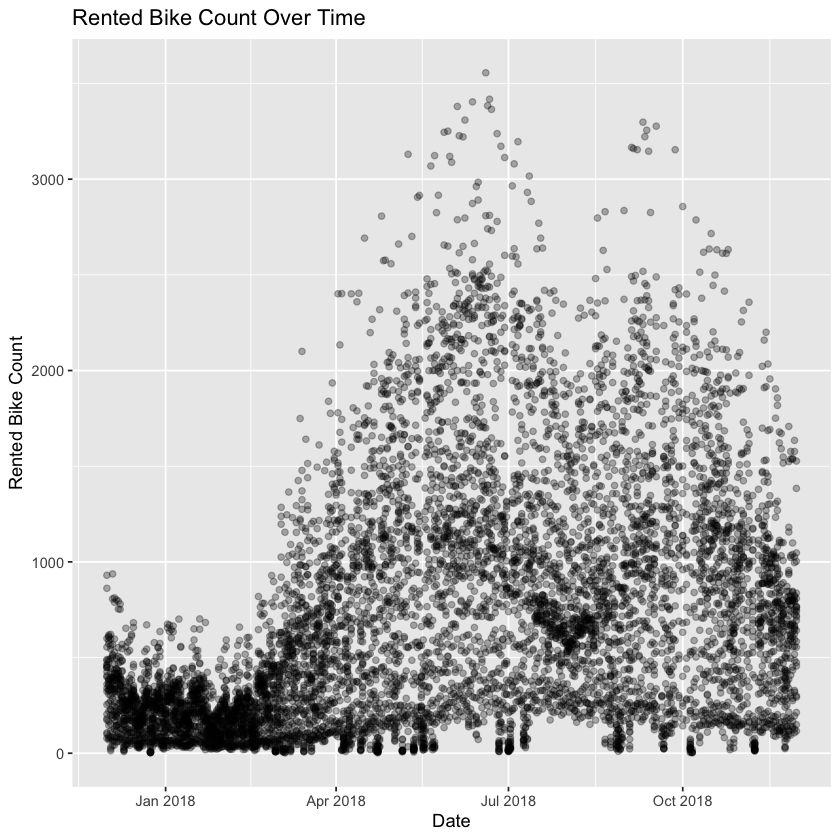

In [20]:
ggplot(seoul_bike_sharing, aes(x = DATE, y = RENTED_BIKE_COUNT)) +
  geom_point(alpha = 0.3) +
  labs(title = "Rented Bike Count Over Time",
       x = "Date",
       y = "Rented Bike Count")


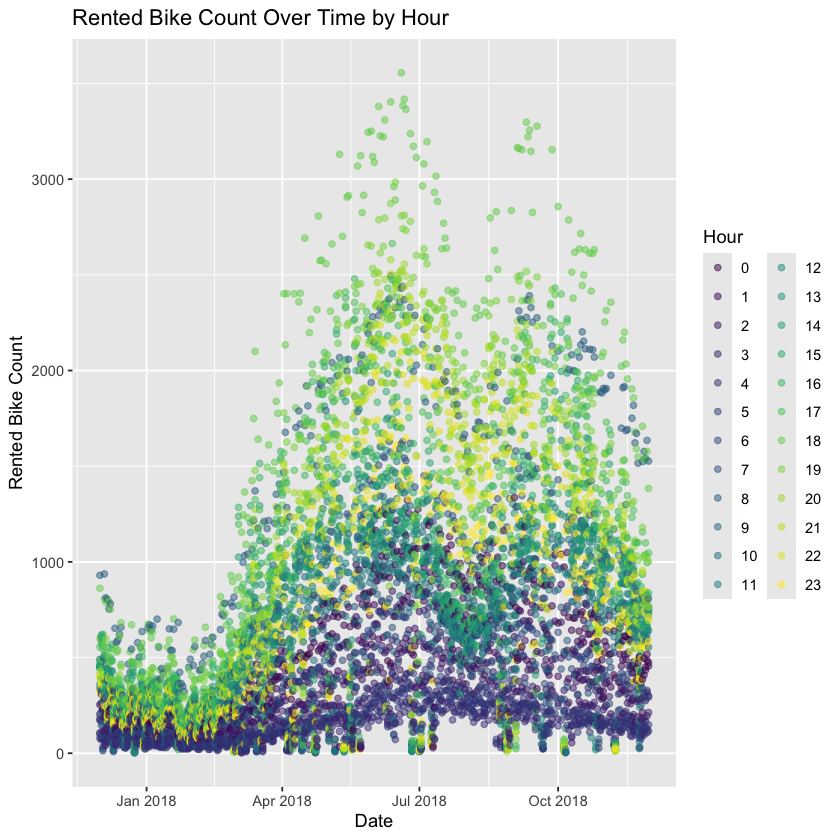

In [22]:
ggplot(seoul_bike_sharing, aes(x = DATE, y = RENTED_BIKE_COUNT, color = HOUR)) +
  geom_point(alpha = 0.5) +
  labs(title = "Rented Bike Count Over Time by Hour",
       x = "Date",
       y = "Rented Bike Count",
       color = "Hour") +
  scale_color_viridis_d()  # nice continuous color scale for ordered hours


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


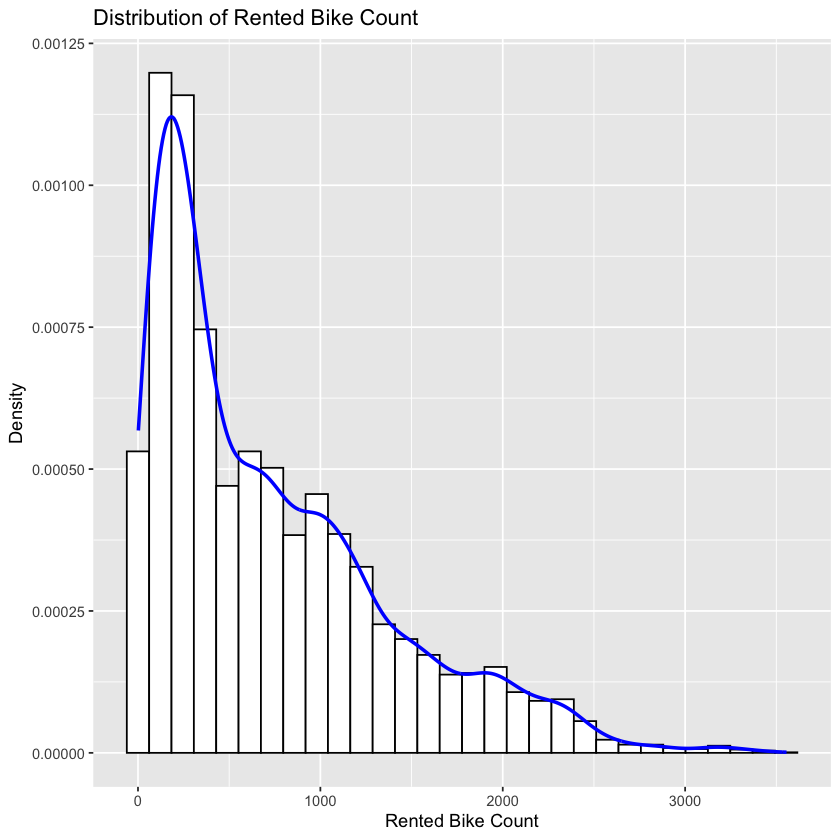

In [23]:
ggplot(seoul_bike_sharing, aes(x = RENTED_BIKE_COUNT)) +
  geom_histogram(aes(y = ..density..), 
                 color = "black", fill = "white", bins = 30) +
  geom_density(color = "blue", size = 1, alpha = 0.7) +
  labs(title = "Distribution of Rented Bike Count",
       x = "Rented Bike Count",
       y = "Density")


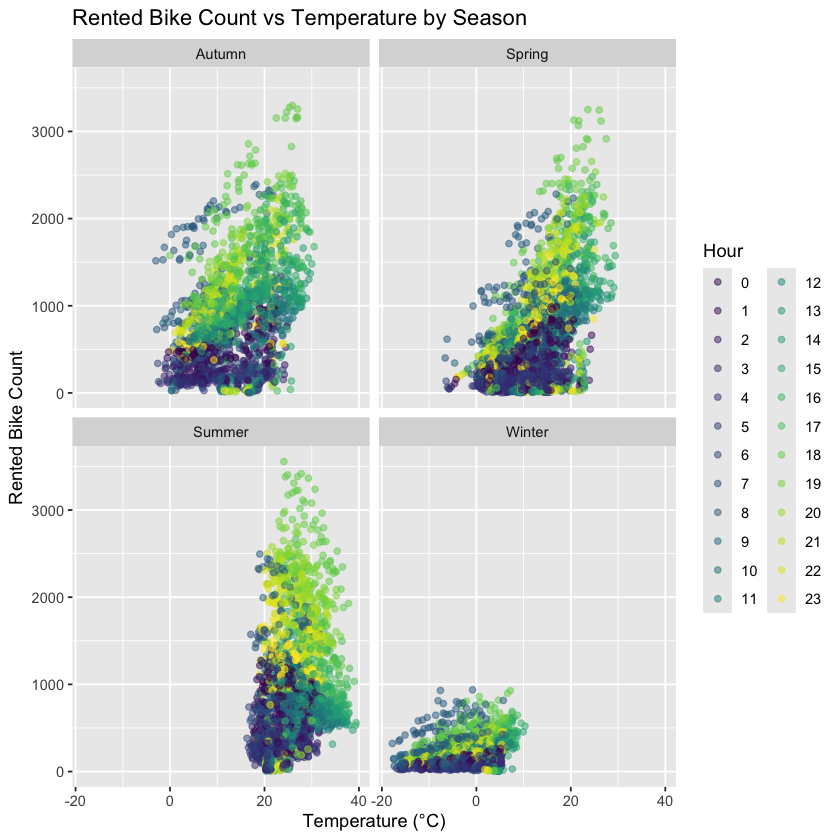

In [24]:
ggplot(seoul_bike_sharing, aes(x = TEMPERATURE, y = RENTED_BIKE_COUNT, color = HOUR)) +
  geom_point(alpha = 0.5) +
  facet_wrap(~ SEASONS) +
  labs(title = "Rented Bike Count vs Temperature by Season",
       x = "Temperature (°C)",
       y = "Rented Bike Count",
       color = "Hour") +
  scale_color_viridis_d()


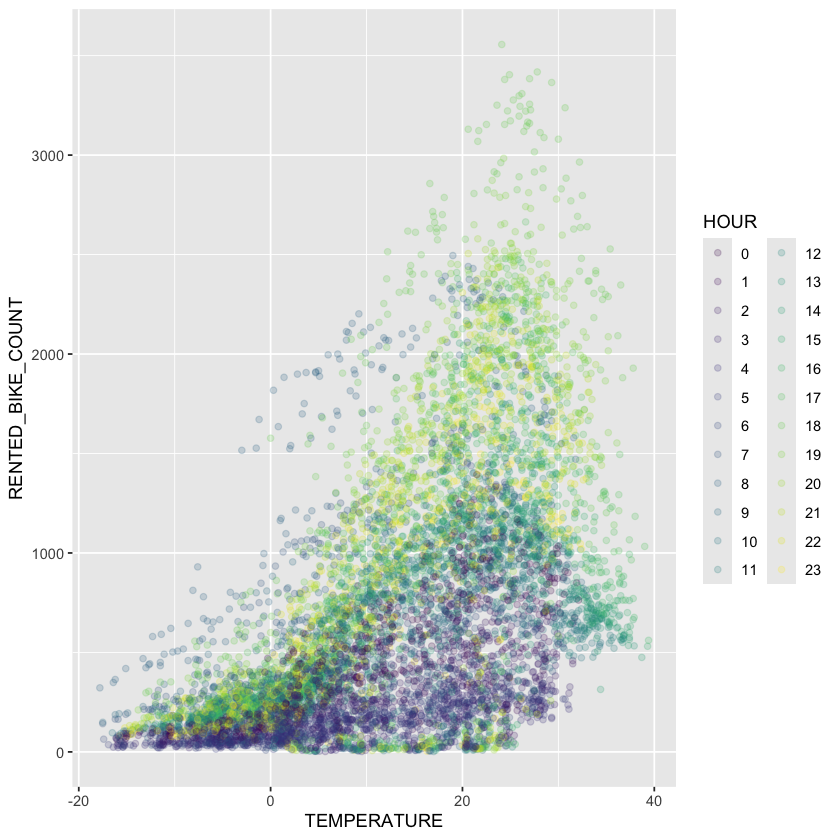

In [25]:
ggplot(seoul_bike_sharing) +
   geom_point(aes(x=TEMPERATURE,y=RENTED_BIKE_COUNT,colour=HOUR),alpha=1/5)

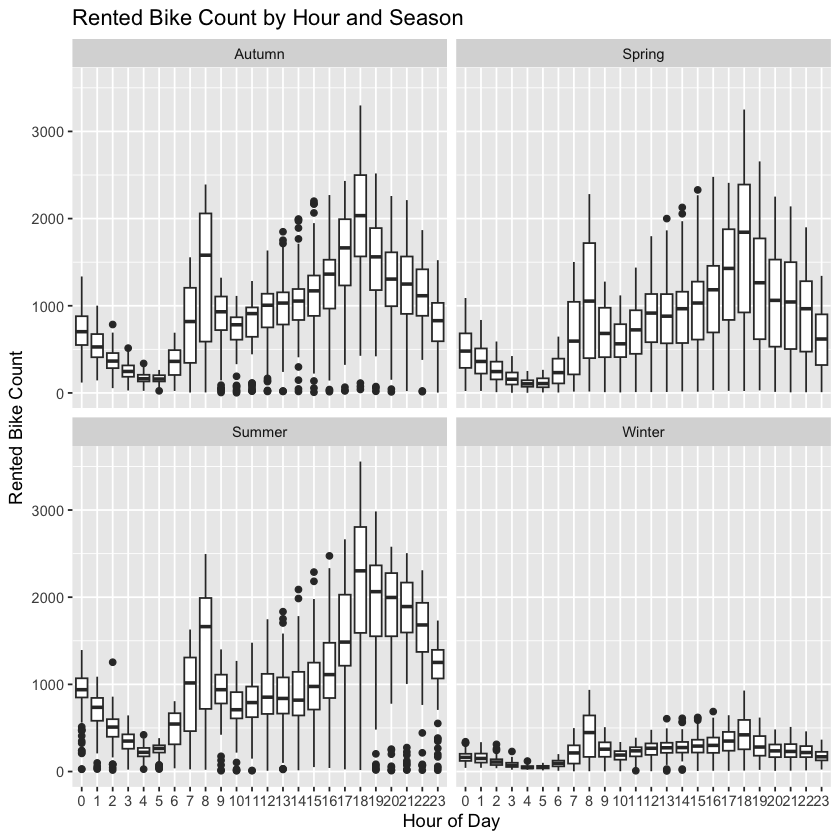

In [26]:
ggplot(seoul_bike_sharing, aes(x = HOUR, y = RENTED_BIKE_COUNT)) +
  geom_boxplot() +
  facet_wrap(~ SEASONS) +
  labs(title = "Rented Bike Count by Hour and Season",
       x = "Hour of Day",
       y = "Rented Bike Count")


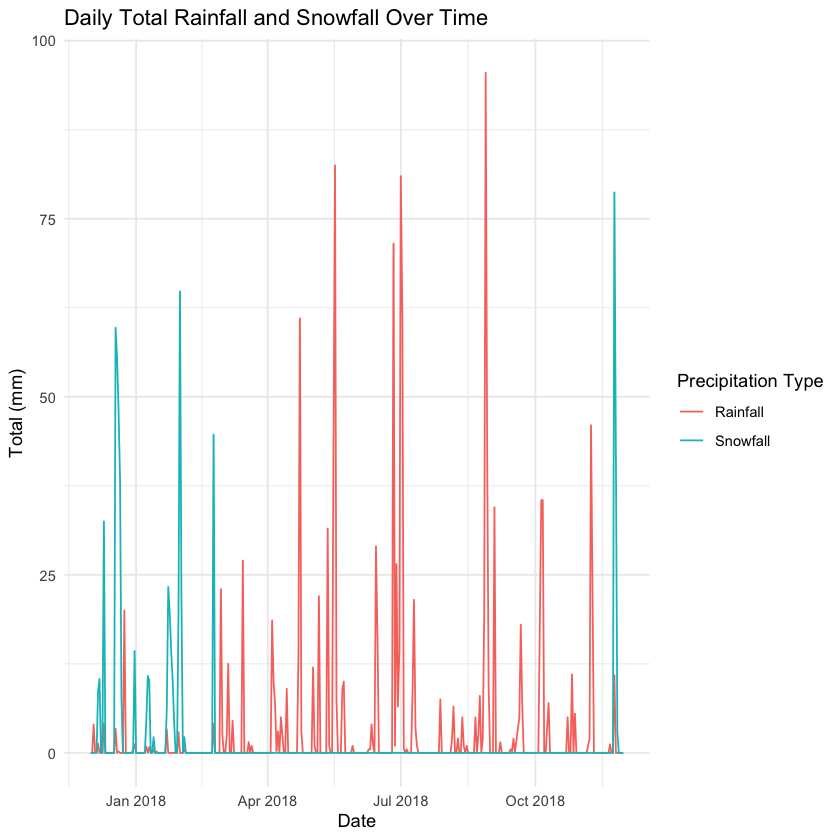

In [27]:
daily_precipitation <- seoul_bike_sharing %>%
  group_by(DATE) %>%
  summarize(
    total_rainfall = sum(RAINFALL, na.rm = TRUE),
    total_snowfall = sum(SNOWFALL, na.rm = TRUE)
  )

# Plot total rainfall over time
ggplot(daily_precipitation, aes(x = DATE)) +
  geom_line(aes(y = total_rainfall, color = "Rainfall")) +
  geom_line(aes(y = total_snowfall, color = "Snowfall")) +
  labs(title = "Daily Total Rainfall and Snowfall Over Time",
       x = "Date",
       y = "Total (mm)",
       color = "Precipitation Type") +
  theme_minimal()

In [28]:
days_with_snowfall <- daily_precipitation %>%
  filter(total_snowfall > 0) %>%
  nrow()

days_with_snowfall


[1] 27